<a href="https://colab.research.google.com/github/TeraneAgaeva/Data-Analysis-course-/blob/main/%22hw_4_5_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_seaborn_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [3]:
!ls drive/MyDrive/yulu_rental.csv

drive/MyDrive/yulu_rental.csv


In [4]:
data_path = 'drive/MyDrive/yulu_rental.csv'
df = pd.read_csv(data_path)

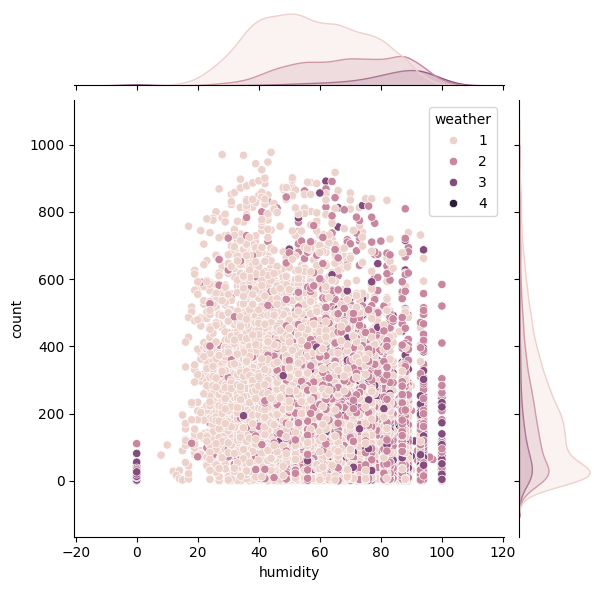

In [6]:
sns.jointplot(data=df, x="humidity", y="count", hue="weather");

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [7]:
# Фильтрация данных по сезонам весна (1) и літо (2)
filtered_df = df.loc[df['season'].isin([1, 2])]

# Печать первых нескольких строк отфильтрованного DataFrame для проверки
print(filtered_df.head())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


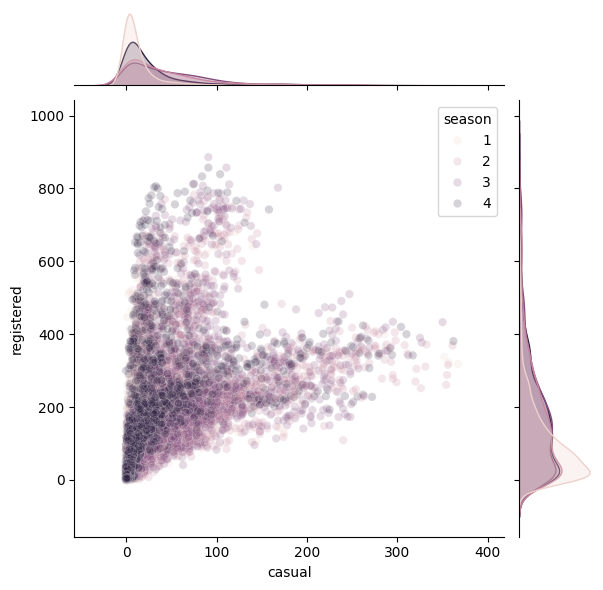

In [8]:
sns.jointplot(data=df, x="casual", y="registered", alpha=0.2, hue="season");

В холодну пору року більше зареєстрованих користувачів ніж неформальних.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


<Axes: xlabel='weather', ylabel='humidity'>

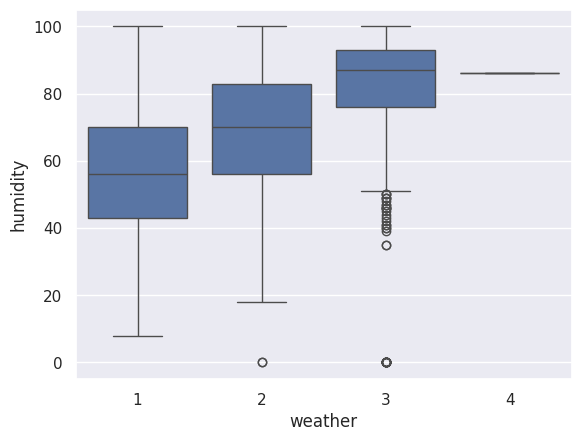

In [11]:
sns.set_theme()
sns.boxplot(data=df, x="weather", y="humidity",)


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

In [13]:
filtered_df = df[['registered', 'casual', 'count', 'workingday']]
filtered_df

,registered,casual,count,workingday
0,13,3,16,0
1,32,8,40,0
2,27,5,32,0
3,10,3,13,0
4,1,0,1,0
...,...,...,...,...
10881,329,7,336,1
10882,231,10,241,1
10883,164,4,168,1
10884,117,12,129,1


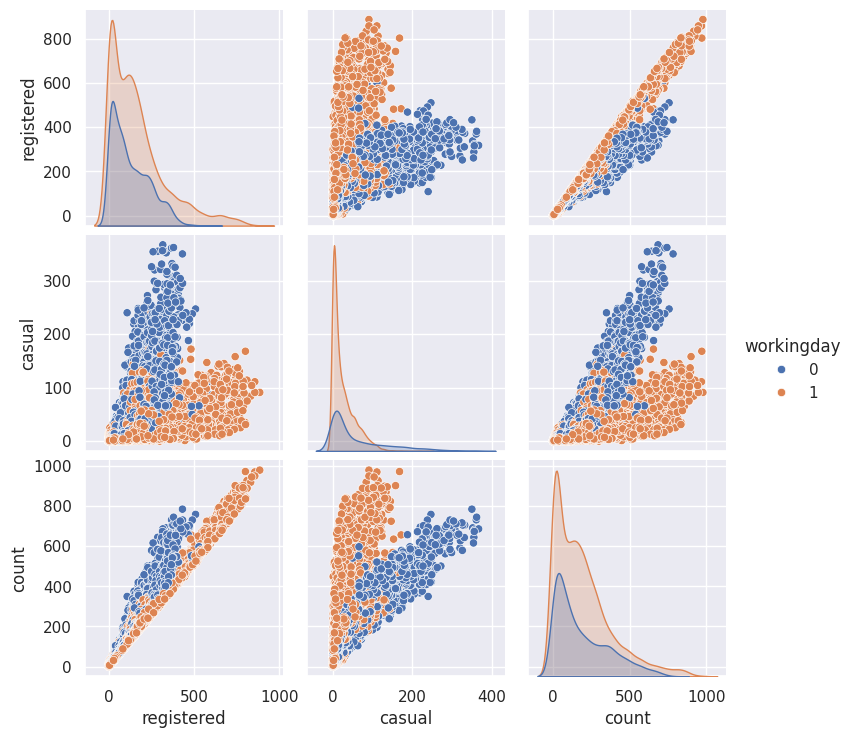

In [14]:
sns.pairplot(filtered_df, hue='workingday');

У святкові дні користувачів більше

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [15]:
df['datetime'] = pd.to_datetime(df['datetime'])


 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [16]:
df['date'] = df.datetime.dt.date

In [17]:
df_viz = df[['registered', 'casual', 'date']]
df_viz

,registered,casual,date
0,13,3,2011-01-01
1,32,8,2011-01-01
2,27,5,2011-01-01
3,10,3,2011-01-01
4,1,0,2011-01-01
...,...,...,...
10881,329,7,2012-12-19
10882,231,10,2012-12-19
10883,164,4,2012-12-19
10884,117,12,2012-12-19


In [19]:
df_viz = df_viz.groupby('date').sum().reset_index()
df_viz

,date,registered,casual
0,2011-01-01,654,331
1,2011-01-02,670,131
2,2011-01-03,1229,120
3,2011-01-04,1454,108
4,2011-01-05,1518,82
...,...,...,...
451,2012-12-15,4280,767
452,2012-12-16,3248,538
453,2012-12-17,4373,212
454,2012-12-18,5124,433


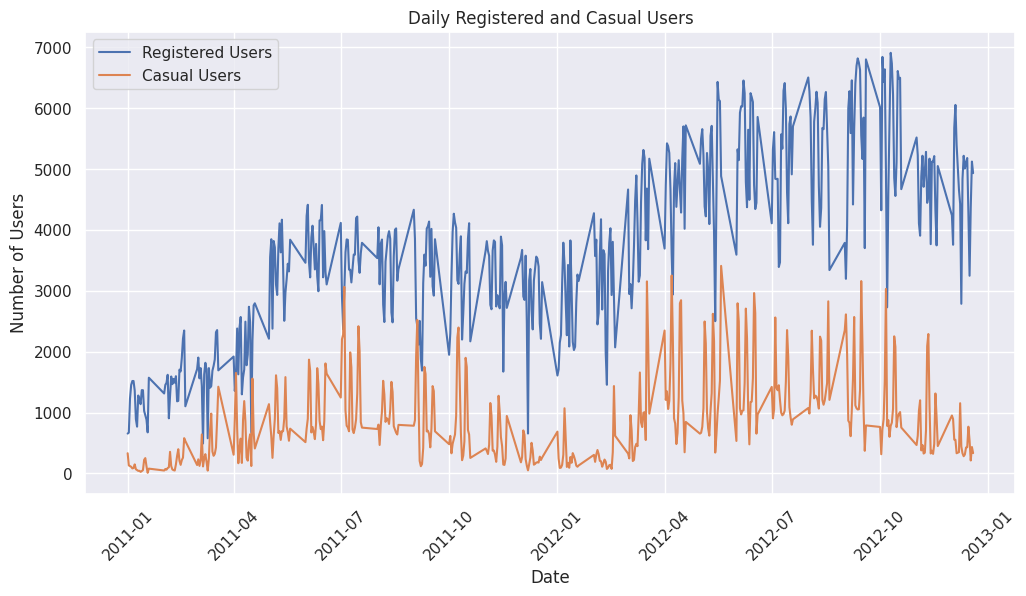

In [20]:
ax = df_viz.plot(x='date', y='registered', label='Registered Users', figsize=(12, 6))
df_viz.plot(x='date', y='casual', label='Casual Users', ax=ax)

# Добавление подписей осей и заголовка
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('Daily Registered and Casual Users')
plt.xticks(rotation=45)
plt.legend()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
